In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.shape

(891, 12)

In [ ]:
df =df.drop(['Cabin','Name','Ticket'],axis =1)

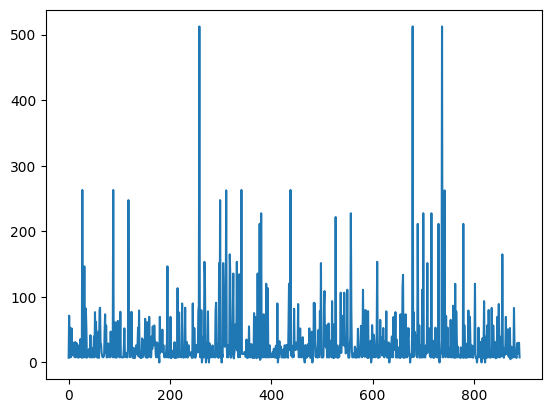

In [ ]:
plt.plot(df['Fare'])

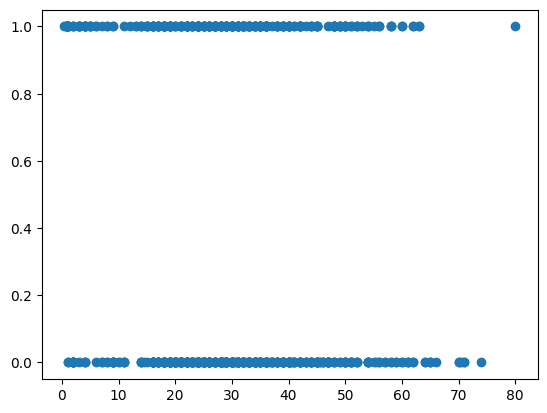

In [ ]:
plt.scatter(df['Age'],df['Survived'])

<BarContainer object of 891 artists>

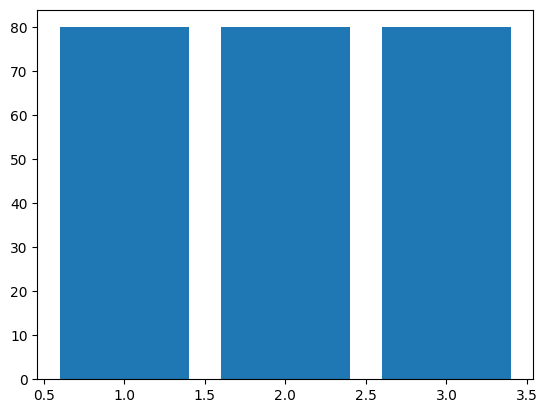

In [ ]:
plt.bar(df['Pclass'],height = 80)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

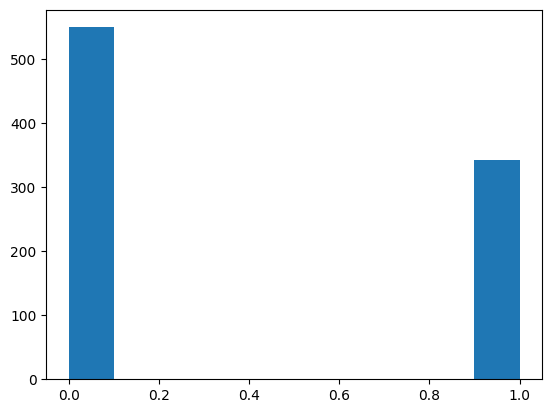

In [ ]:
plt.hist(df['Survived'])

In [ ]:
#sns.pairplot(df,hue = 'Survived')

<Axes: ylabel='Age'>

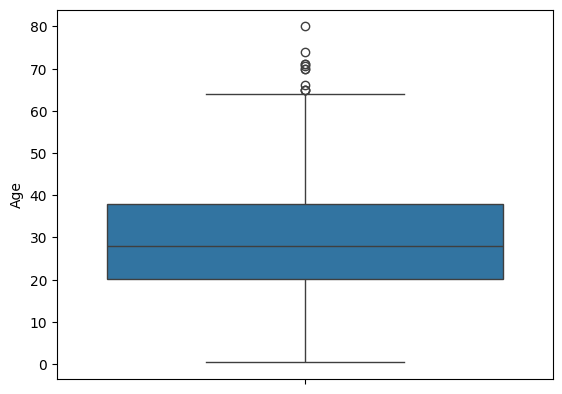

In [ ]:
sns.boxplot(df['Age'])

In [ ]:
df['Age'].max()

80.0

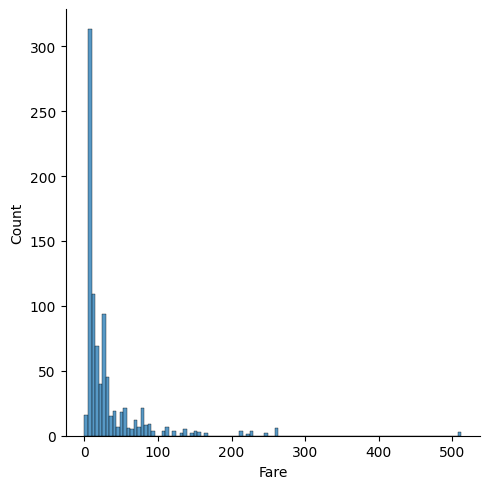

In [ ]:
sns.displot(x=df['Fare'])

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
cl = ['Embarked','Sex']

for i in cl:
  df[i] = lbl.fit_transform(df[i])

In [ ]:
X = df.drop(['Survived'],axis = 1)
Y = df['Survived']

In [ ]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(X,Y,random_state = 41,test_size=.2)

In [ ]:
y_train

628    0
300    1
663    0
50     0
846    0
      ..
407    1
601    0
243    0
321    0
80     0
Name: Survived, Length: 712, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
g = StandardScaler()
x_train = g.fit_transform(x_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier( )


In [ ]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix
acc = accuracy_score(y_pred,y_test)
acc

0.5810055865921788